** This is the iris dataset classification example. 
The dataset is downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data. Each sample has 4 features (sepal length, sepal width, petal length, petal width) and is classified into one of the 3 classes (iris-setosa, iris-versicolor,iris-virginica). Different classification libraries from sklearn including KNN, SVM and XGBOOST are tested. **

In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [4]:
%matplotlib inline

In [5]:
# Function to plot decision regions
def plot_decision_regions(x1,x2,y):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    x1mesh, x2mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.005),
                     np.arange(x2_min, x2_max, 0.005))            
    ymesh = scipy.interpolate.griddata((x1,x2),y,
        (x1mesh,x2mesh),method='nearest')
    plt.contourf(x1mesh,x2mesh,ymesh)
    plt.xlim([x1mesh.min(),x1mesh.max()])
    plt.ylim([x2mesh.min(),x2mesh.max()])

In [6]:
# Funtion to define data points color
def colordict(y):
    cdict = {0:'red',1:'yellow',2:'blue'}
    ycolor = [' ']*len(y)
    for i in range(0,len(y)):
        ycolor[i] = cdict[y[i]]
    return ycolor

In [7]:
# Function to output confusion matrix
def output_cm(y_test, y_pred):
    cfm = confusion_matrix(y_test, y_pred)
    print(cfm)
    count_correct = cfm[0,0] + cfm[1,1] + cfm[2,2]
    print('Prediction accuracy on test set is {} out of {} ({}%).' 
       .format(count_correct, len(y_test),int(100*count_correct/len(y_test))))

In [8]:
# This is a classic Iris dataset used a classification example
iris = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)

In [9]:
# Assign names for the 5 columns if needed
iris.columns = ['SEPAL-LENGTH','SEPAL-WIDTH','PETAL-LENGTH','PETAL-WIDTH','CLASS']

** Histograms of the 4 feature values **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8432c03080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8432b4a320>]], dtype=object)

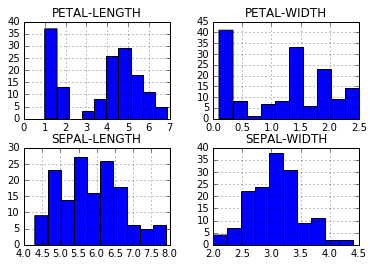

In [10]:
iris.hist()

In [11]:
iris.head()

,SEPAL-LENGTH,SEPAL-WIDTH,PETAL-LENGTH,PETAL-WIDTH,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.tail()

,SEPAL-LENGTH,SEPAL-WIDTH,PETAL-LENGTH,PETAL-WIDTH,CLASS
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
X = iris.iloc[:,:-1].values
y = iris.iloc[:,4].values

In [14]:
# Encode class
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

** Split dataset into training and test set. The training set size is set to 75%. **

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Sample count in the dataset:{}'.format(len(X)))
print('Sample count in the training set:{}'.format(len(X_train)))
print('Sample count in the test set:{}'.format(len(X_test)))

Sample count in the dataset:150
Sample count in the training set:112
Sample count in the test set:38


** Feature scaling **

In [16]:
sc_X = StandardScaler()
Xsc_train = sc_X.fit_transform(X_train)
Xsc_test = sc_X.fit_transform(X_test)
Xsc = sc_X.fit_transform(X)

** Plot data points in the training set **

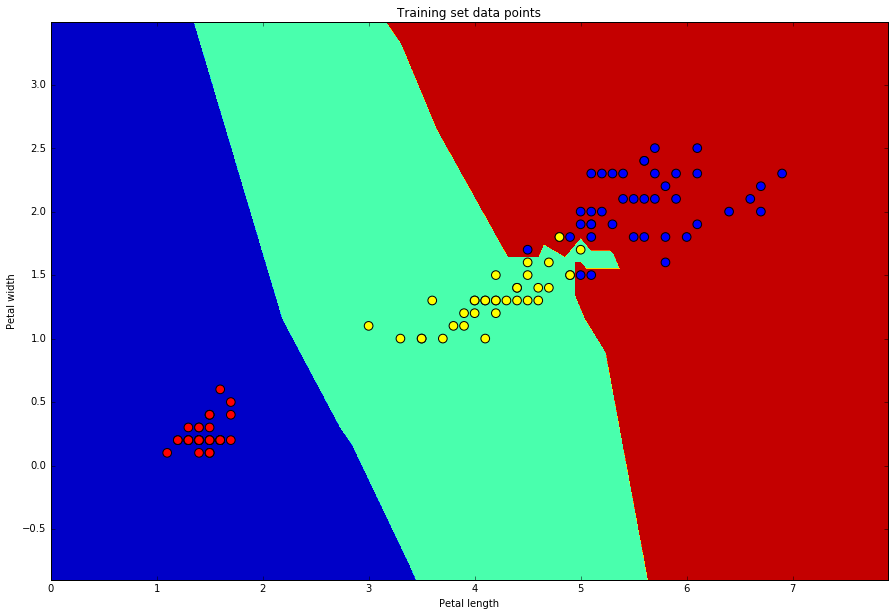

In [17]:
#plt.style.use('classic')   
plt.figure(figsize=(15,10))   
plot_decision_regions(X[:, 2],X[:, 3],y)
plt.scatter(X_train[:,2],X_train[:,3], c=colordict(y_train),edgecolor='black',s=75)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Training set data points')
plt.show()

** Use KNN for classification **

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xsc_train, y_train)
y_pred = classifier.predict(Xsc_test)

In [19]:
# Confusion matrix: The numbers on the diagonal line are 
# the counts of correctly predicted samples for each class.  
print( 'Confusion matrix using KNN classification')
output_cm(y_test, y_pred)

Confusion matrix using KNN classification
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]
Prediction accuracy on test set is 36 out of 38 (94%).


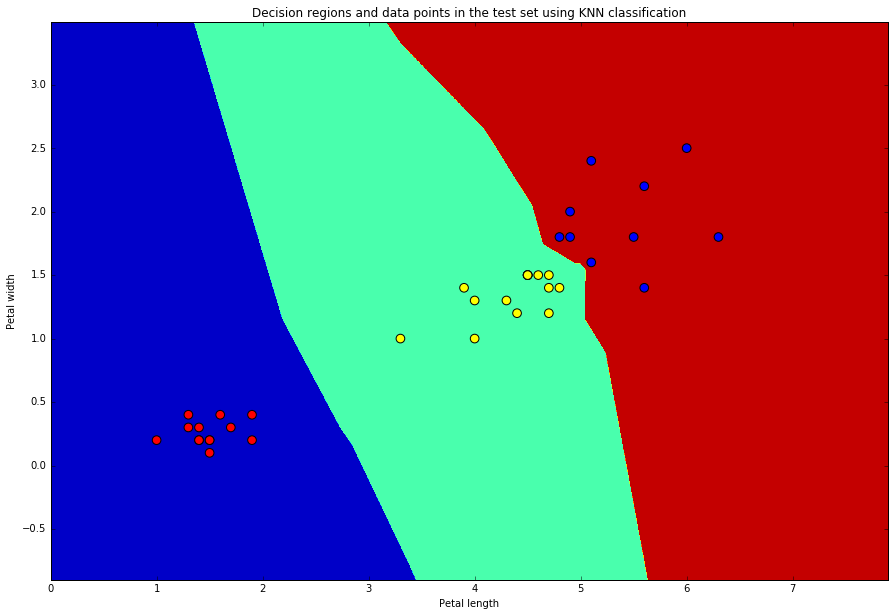

In [20]:
# Plot decision regions and data points
#plt.style.use('classic')   
plt.figure(figsize=(15,10))   
plot_decision_regions(X[:, 2],X[:, 3],classifier.predict(Xsc))
plt.scatter(X_test[:,2],X_test[:,3], c=colordict(y_pred),edgecolor='black',s=75)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision regions and data points in the test set using KNN classification')
plt.show()

** Use SVM for classification **

In [21]:
classifier = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
classifier.fit(Xsc_train, y_train)
y_pred = classifier.predict(Xsc_test)
print( 'Confusion matrix using SVM classification')
output_cm(y_test, y_pred)

Confusion matrix using SVM classification
[[13  0  0]
 [ 0 12  4]
 [ 0  0  9]]
Prediction accuracy on test set is 34 out of 38 (89%).


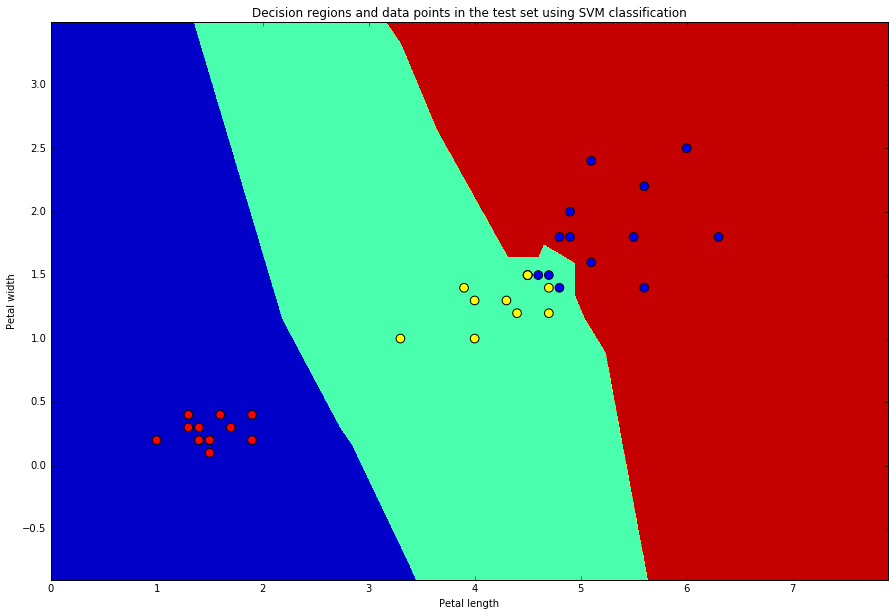

In [22]:
plt.figure(figsize=(15,10))   
plot_decision_regions(X[:, 2],X[:, 3],classifier.predict(Xsc))
plt.scatter(X_test[:,2],X_test[:,3], c=colordict(y_pred),edgecolor='black',s=75)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision regions and data points in the test set using SVM classification')
plt.show()

** Use XGBoost for classification **

In [23]:
classifier = xgb.XGBClassifier()
classifier.fit(Xsc_train, y_train)
y_pred = classifier.predict(Xsc_test)
print( 'Confusion matrix using XGBoost classification')
output_cm(y_test, y_pred)

Confusion matrix using XGBoost classification
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Prediction accuracy on test set is 37 out of 38 (97%).


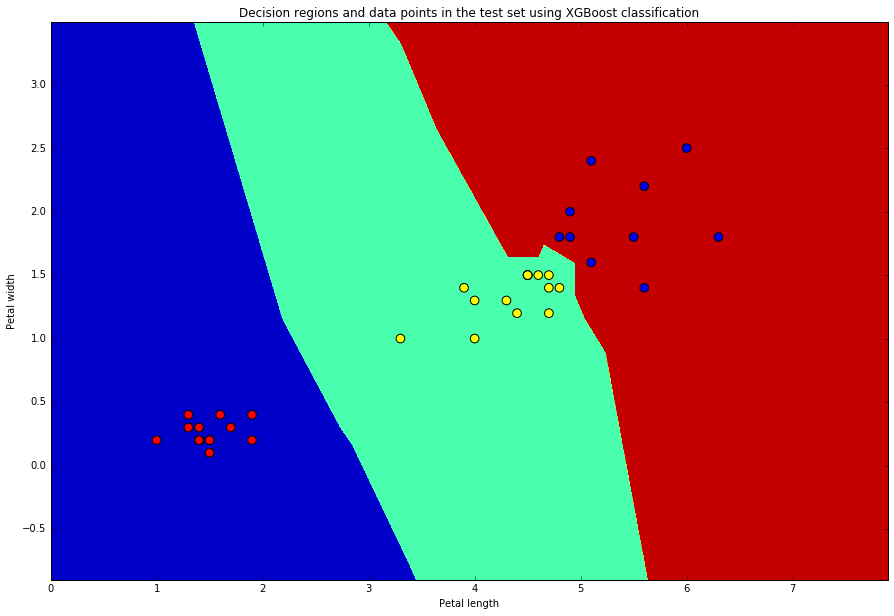

In [24]:
plt.figure(figsize=(15,10))   
plot_decision_regions(X[:, 2],X[:, 3],classifier.predict(Xsc))
plt.scatter(X_test[:,2],X_test[:,3], c=colordict(y_pred),edgecolor='black',s=75)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision regions and data points in the test set using XGBoost classification')
plt.show()